In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

## Đọc dữ liệu

In [2]:
titanic = pd.read_csv('data/titanic.csv')

## Xem thông tin sơ bộ

In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## I. Xác định các thuộc tính

In [8]:
# output: Survived
# inputs: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

In [9]:
# categorical: Survived, Pclass, Sex, Embarked
# numeric: Age, SibSp, Parch, Fare

In [10]:
# chọn các thuộc tính
df = titanic[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## II. Phân tích đơn biến - Biến categorical

In [11]:
# Biến nhóm Pclass
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [12]:
df.Pclass.nunique()

3

In [13]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
df.Pclass.value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

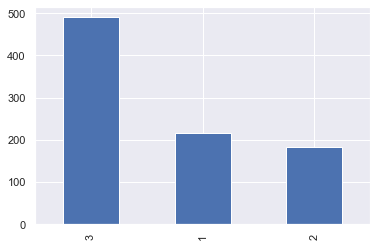

In [15]:
df.Pclass.value_counts().plot.bar()
plt.show()
# Pclass 3 có nhiều hành khách nhất 491

Survived
[0 1]
0    549
1    342
Name: Survived, dtype: int64


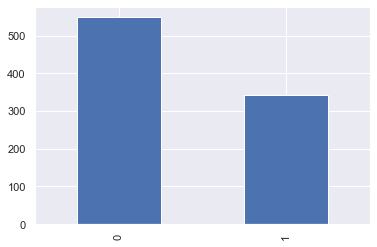

Pclass
[3 1 2]
3    491
1    216
2    184
Name: Pclass, dtype: int64


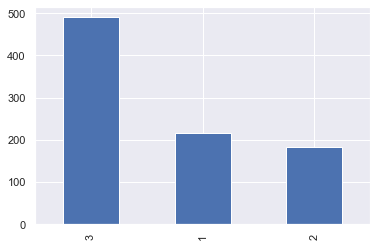

Sex
['male' 'female']
male      577
female    314
Name: Sex, dtype: int64


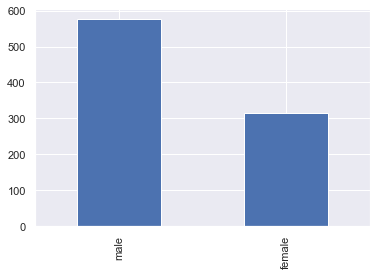

Embarked
['S' 'C' 'Q' nan]
S    644
C    168
Q     77
Name: Embarked, dtype: int64


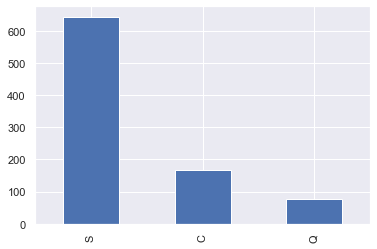

In [16]:
# categorical: Survived, Pclass, Sex, Embarked
cat_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
for col in cat_cols:
    print(col)
    print(titanic[col].unique())
    print(titanic[col].value_counts())
    titanic[col].value_counts().plot.bar()
    plt.show()

## II. Phân tích đơn biến - Biến numeric

In [17]:
# biến Age
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
# có ít nhất 25% hành khách có tuổi <= 20 tuổi
# có ít nhất 75% hành khách có tuổi >= 20 tuổi

In [19]:
df.groupby('Sex').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [20]:
df.Age.std()

14.526497332334042

In [21]:
print("Q1 25%:", df['Age'].quantile(0.25))
print("Q2 50%:", df['Age'].quantile(0.50))
print("Q3 75%:", df['Age'].quantile(0.75))

Q1 25%: 20.125
Q2 50%: 28.0
Q3 75%: 38.0


In [22]:
range = df['Age'].max()-df['Age'].min()
range

79.58

In [23]:
iqr = df.Age.quantile(0.75)-df.Age.quantile(0.25) # khoảng trải giữa
iqr

17.875

In [24]:
df['Age'].skew() # >0: phân phối lệch phải

0.38910778230082704

In [25]:
df['Age'].kurtosis() # >0: nhọn hơn phân phối chuẩn

0.17827415364210353

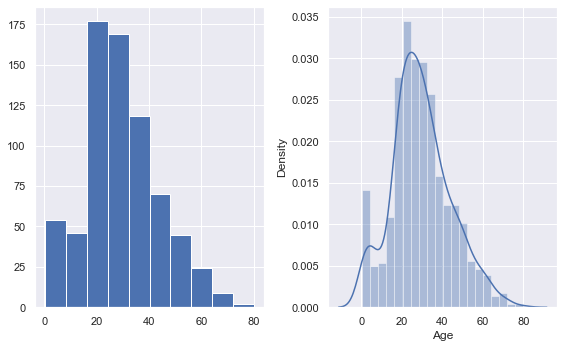

In [26]:
# Vẽ biểu đồ hist
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.hist(df.Age)
plt.subplot(1,2,2)
sns.distplot(df.Age)
plt.tight_layout()
plt.show()
# xấp xỉ phân phối chuẩn
# phân phối lệch phải

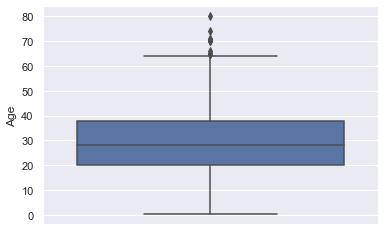

In [27]:
# vẽ boxplot
sns.boxplot(data=df, y='Age')
plt.show()
# có outlier

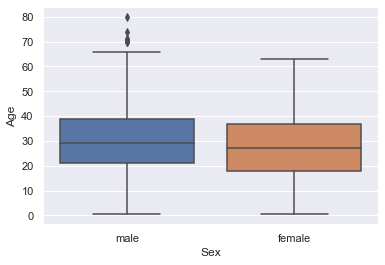

In [28]:
# vẽ boxplot
sns.boxplot(data=df, y='Age', x='Sex')
plt.show()
# có outlier

In [29]:
# numeric: Age, SibSp, Parch, Fare
# biến SibSp?
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [30]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

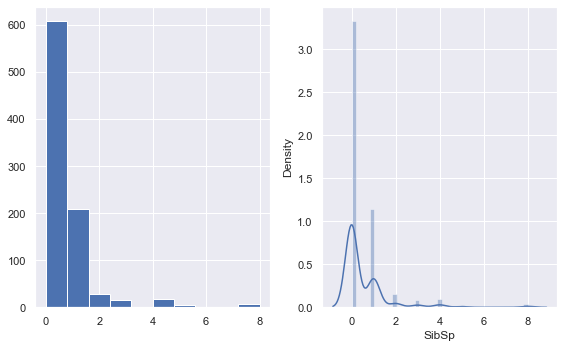

In [31]:
# Vẽ biểu đồ hist
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.hist(df.SibSp)
plt.subplot(1,2,2)
sns.distplot(df.SibSp)
plt.tight_layout()
plt.show()
# phân phối lệch phải

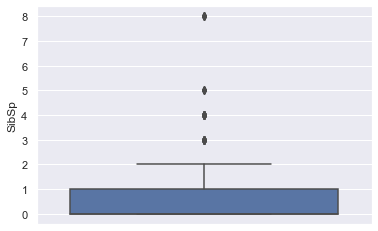

In [32]:
sns.boxplot(data=df, y='SibSp')
plt.show()

## II. Phân tích hai biến - Biến numeric và biến numeric

In [33]:
# Biến Age và Fare
df[['Fare','Age']].corr() # không có mối tương quan giữa Fare và Age

,Fare,Age
Fare,1.000000,0.096067
Age,0.096067,1.000000


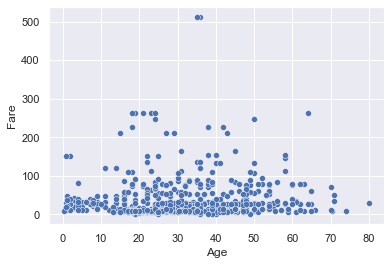

In [34]:
sns.scatterplot(data=df, x='Age', y='Fare');

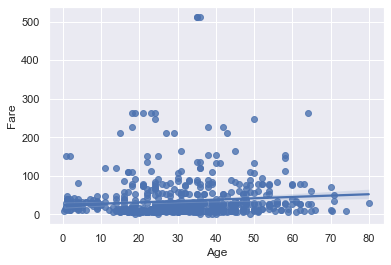

In [35]:
sns.regplot(data=df, x='Age', y='Fare');

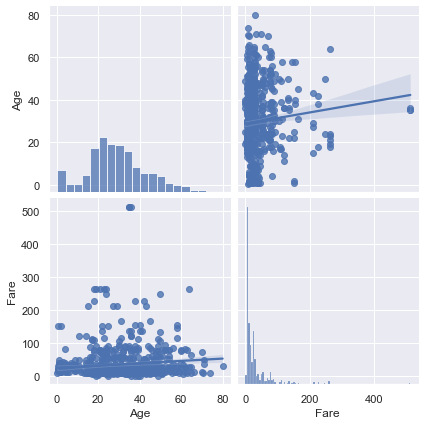

In [36]:
sns.pairplot(data=df, vars=['Age','Fare'], size=3, kind='reg')
plt.show()

## II. Phân tích hai biến - Biến categorical và biến categorical

In [37]:
# Biến Pclass và biến Sex

In [37]:
# Two-way Table
table = pd.crosstab(df.Pclass, df.Sex)
table

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


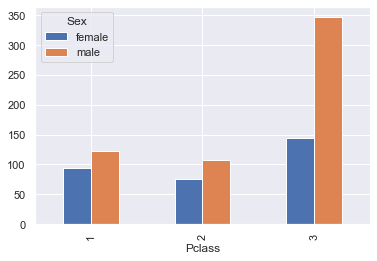

In [38]:
table.plot.bar();

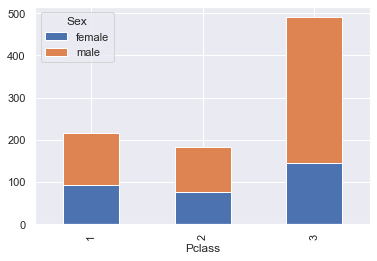

In [39]:
table.plot(kind='bar', stacked=True);

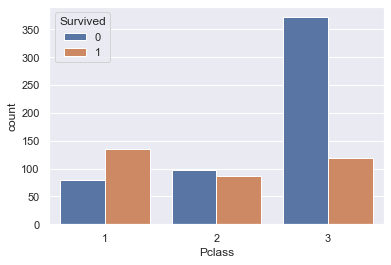

In [41]:
# biến Pclass và biến Survived
sns.countplot(data=titanic, x='Pclass', hue='Survived')
plt.show()

In [40]:
# Chi-square Test
from scipy.stats import chi2_contingency
# from scipy.stats import chi2

In [41]:
# kiểm định Chi-square cho 2 biến phân loại: biến Pclass và biến Sex
# H0: Pclass và Sex là 2 biến độc lập
# H1: Pclass và Sex là 2 biến phụ thuộc

# dựa trên mẫu, tính p-value
# chọn mức kiểm định: alpha = 1 - 0.95 = 0.05 (khoảng tin cậy 95%)
# nếu p-value < alpha ==>  bác bỏ H0: Pclass và Sex là 2 biến phụ thuộc
# nếu p-value >= alpha ==>  chấp nhận H0: Pclass và Sex là 2 biến độc lập

In [42]:
# contingency table
table = pd.crosstab(titanic['Pclass'], titanic['Sex'])
table

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [43]:
stat, p, dof, expected = chi2_contingency(table)
stat, p, dof

(16.971499095517114, 0.00020638864348233114, 2)

In [44]:
if p<0.05:
    print('Dependent (reject H0) ==> Pclass và Sex là hai biến phụ thuộc')
else:
    print('Independent (fail to reject H0) ==> Pclass và Sex là hai biến độc lập')

Dependent (reject H0) ==> Pclass và Sex là hai biến phụ thuộc


## III. Phân tích hai biến - Biến categorical và biến numeric

In [47]:
# Biến Pclass và Sex có ảnh hưởng đến Fare?

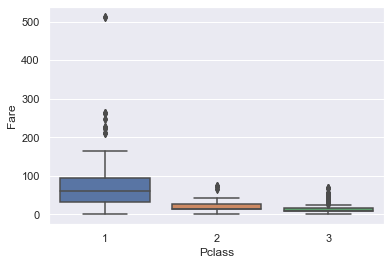

In [45]:
sns.boxplot(data=titanic, x='Pclass', y='Fare');

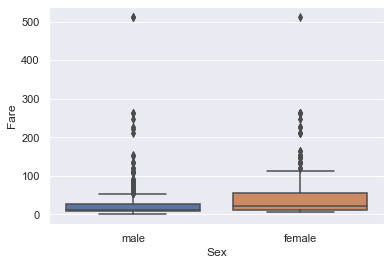

In [46]:
sns.boxplot(data=titanic, x='Sex', y='Fare');

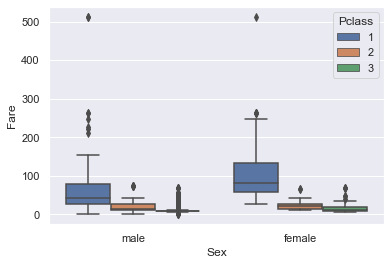

In [50]:
sns.boxplot(data=titanic, x='Sex', y='Fare', hue='Pclass');

In [47]:
# Phân tích phương sai (analysis of variance-ANOVA)
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [48]:
d_melt = titanic[['Pclass', 'Sex', 'Fare']]
d_melt.head()

,Pclass,Sex,Fare
0,3,male,7.2500
1,1,female,71.2833
2,3,female,7.9250
3,1,female,53.1000
4,3,male,8.0500


In [49]:
model = ols('Fare ~ C(Pclass) + C(Sex) + C(Pclass):C(Sex)', data=d_melt).fit()

In [50]:
anova_table = sm.stats.anova_lm(model, typ=2) # Tham số typ=2  xét giả thuyết kiểm định 2 bên
anova_table

,sum_sq,df,F,PR(>F)
C(Pclass),7.347122e+05,2.0,242.620968,9.763645e-85
C(Sex),3.174857e+04,1.0,20.968394,5.337586e-06
C(Pclass):C(Sex),5.002816e+04,2.0,16.520591,9.034206e-08
Residual,1.339992e+06,885.0,NaN,NaN


In [55]:
# Giải thích: P-value thu được từ phân tích ANOVA cho Sex, Pclass, và phối hợp có ý nghĩa thống kê (P <=0.05).
# Kết luận: Pclass ảnh hưởng đáng kể đến Fare, Sex ảnh hưởng đến Fare và 
# sự phối hợp của cả Pclass và Sex ảnh hưởng đáng kể đến Fare

In [56]:
# Bây giờ, chúng ta biết rằng sự khác biệt về Pclass, Sex có ý nghĩa thống kê, 
# nhưng ANOVA không cho biết Pclass và Sex khác nhau đáng kể với nhau.
# Để biết các cặp Pclass và Sex khác nhau đáng kể, thực hiện post-hoc comparison sử dụng Tukey HSD.

In [51]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
for name, grouped_df in d_melt.groupby('Sex'):
    print('Sex {}'.format(name), pairwise_tukeyhsd(grouped_df['Fare'], 
                                                   grouped_df['Pclass'], 
                                                   alpha=0.05))

Sex female   Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     1      2 -84.1557    0.0  -99.3115 -68.9999   True
     1      3  -90.007    0.0 -103.0347 -76.9793   True
     2      3  -5.8513 0.5842  -19.7812   8.0786  False
-------------------------------------------------------
Sex male  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2 -47.4843    0.0 -59.0652 -35.9035   True
     1      3 -54.5645    0.0 -63.7904 -45.3386   True
     2      3  -7.0801 0.1976 -16.7384   2.5781  False
------------------------------------------------------


In [58]:
# chia input variables ra làm 2 loại: biến số liên tục và biến phân loại

In [59]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [60]:
df = titanic.drop(columns=['PassengerId','Name','Cabin','Ticket'])

In [61]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [62]:
df['Pclass'] = df['Pclass'].astype('object')
df['Survived'] = df['Survived'].astype('object')

In [63]:
num_cols = df.select_dtypes(include=['int','float']).columns
num_cols

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [64]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Survived', 'Pclass', 'Sex', 'Embarked'], dtype='object')